# <center> Face mask Classification Project</span></a></center>

### Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np #array processing 
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #image processing
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from skimage. transform import resize
from sklearn.utils import shuffle
import glob

### find the path

In [2]:
pwd

'C:\\Users\\Kavya\\Desktop\\Edure\\DEEP LEARNING\\Capstone projects\\Face mask Identification'

In [3]:
with_mask = glob.glob('with_mask 1/with_mask 1/*.jpg')
without_mask = glob.glob('without_mask/without_mask/*.jpg')

with_mask_test = glob.glob('with_mask 1/with_mask 1/*.jpg')
without_mask_test = glob.glob('without_mask/without_mask/*.jpg')

In [4]:
print (f'number of  masked images is = {len(with_mask)}')
print (f'number of without masked images is = {len(without_mask)}')

print (f'number of  masked_test images is = {len(with_mask)}')
print (f'number of without masked_test images is = {len(without_mask)}')


number of  masked images is = 424
number of without masked images is = 195
number of  masked_test images is = 424
number of without masked_test images is = 195


In [5]:
image = []
label = []

for i in with_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in without_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

In [6]:
image

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [7]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [8]:
#test

image_test = []
label_test = []

for i in with_mask_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in without_mask_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [9]:
# Train shuffle
image, label = shuffle(image, label, random_state=100)

# Test shuffle
image_test, label_test = shuffle(image_test, label_test, random_state=100)

In [10]:
len(image_test)

619

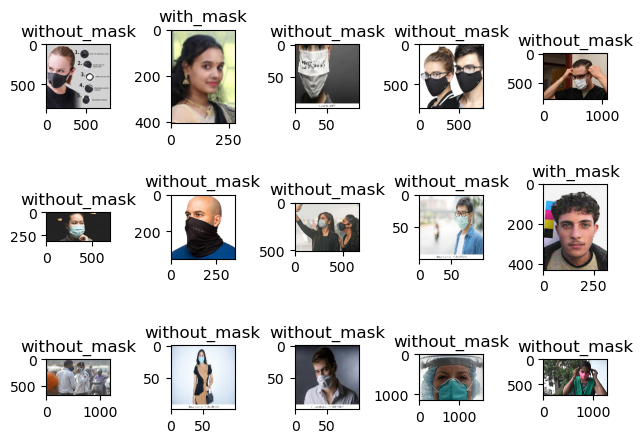

In [11]:
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
        plt.tight_layout()

In [14]:
# train resize
x_train = []
for i in image:
    x_train.append(resize(i,(64,64,3)))
x_train = np.array(x_train)

In [15]:
# test resize

x_test = []
for i in image_test:
    x_test.append(resize(i,(64,64,3)))

# Array Format

x_test = np.array(x_test)

In [16]:
y_train = np.array(label)
y_test = np.array(label_test)

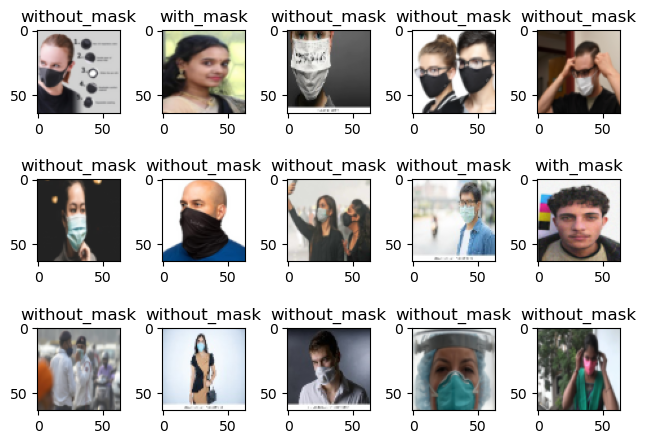

In [17]:
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i])
    if label[i] == 1:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
        plt.tight_layout()

In [18]:
# CNN Model
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

C:\Users\Kavya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
np.unique(y_train)

array([0, 1])

In [39]:
# compiling
 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,973,313 (7.53 MB)

 Trainable params: 1,973,313 (7.53 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
x_train.shape

(3488, 64, 64, 3)

In [49]:
# Training the model

model.fit(x_train, y_train, epochs = 11, validation_split = 0.1)

Epoch 1/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 1.0000 - loss: 6.1544e-05 - val_accuracy: 0.9656 - val_loss: 0.2394
Epoch 2/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 1.0000 - loss: 5.1882e-05 - val_accuracy: 0.9656 - val_loss: 0.2378
Epoch 3/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 1.0000 - loss: 4.8124e-05 - val_accuracy: 0.9656 - val_loss: 0.2392
Epoch 4/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 1.0000 - loss: 4.4052e-05 - val_accuracy: 0.9656 - val_loss: 0.2443
Epoch 5/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 1.0000 - loss: 4.2964e-05 - val_accuracy: 0.9656 - val_loss: 0.2438
Epoch 6/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 1.0000 - loss: 3.5053e-05 - val_accuracy: 0.9656 - val_loss: 0.2413
Epoch 7/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 1.0000 - loss: 2.9007e-05 - val_accuracy: 0.9656 - val_loss: 0.2462
Epoch 8/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 1.0000 - loss: 3.05

In [51]:
# Evaluating the model

model.evaluate(x_test, y_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9998 - loss: 0.0021    


[0.024945179000496864, 0.9965596199035645]

In [53]:
# Predicting
prediction = model.predict(x_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [55]:
prediction

array([[1.4877689e-08],
       [9.9999881e-01],
       [1.6036256e-04],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0533047e-04]], dtype=float32)

In [57]:
pred = []

for i in prediction:
    if i >0.5:
        pred.append(1)
    else:
        pred.append(0)

In [59]:
len(pred)

3488

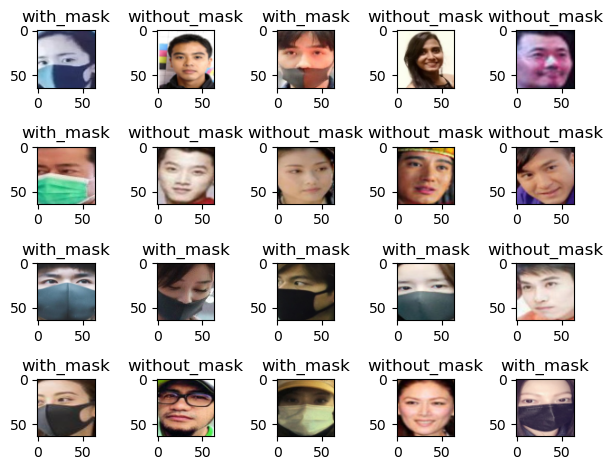

In [63]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i])
    if pred[i] == 1:
        plt.title('without_mask')
    else:
        plt.title('with_mask')
        plt.tight_layout()

In [65]:
print(confusion_matrix(y_test,pred))

[[1692    4]
 [   8 1784]]


In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<Axes: >

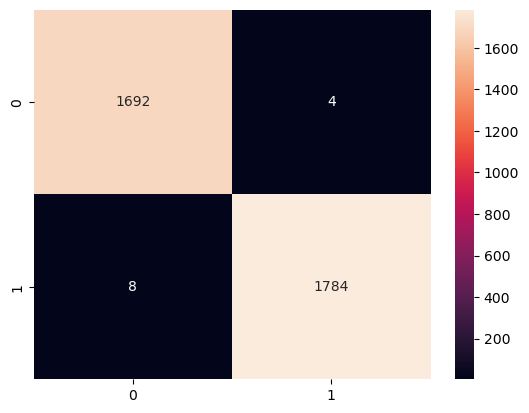

In [69]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='d')

In [71]:
confusion_matrix(y_test,pred)

array([[1692,    4],
       [   8, 1784]], dtype=int64)

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1696
           1       1.00      1.00      1.00      1792

    accuracy                           1.00      3488
   macro avg       1.00      1.00      1.00      3488
weighted avg       1.00      1.00      1.00      3488

